# Assignment 3 - Acquiring Data

## Part 1 - Ask a question!

How can we decide the correlation between the features

## _Notes_

## Find data set/s related to that question
There are a lot of open data sets out there that you can access. Some places that you can find data sets are listed below, but there are plenty of data sets out there.

1. Kaggle - Lots of interesting data sets  https://www.kaggle.com/datasets
1. UC Irvine Machine Learning Repo - A venerable source of data.  Some what dated now.  http://mlr.cs.umass.edu/ml/
1. US government.  The open data sets from the US government. https://catalog.data.gov/dataset (_Many organinizations/governments make data sets available. I have given three, but check around for others._) 
1. UK data sets https://www.ukdataservice.ac.uk
1. IMF data setshttps://www.imf.org/en/Data
1. Amazon AWS data sets - Data sets that can be aquired through AWS services https://registry.opendata.aws
1. Wikipedia list of data sets - https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research
1. 538 - Politics and sports opinions https://fivethirtyeight.com
1. Awesome data - a collection of data sets on github https://github.com/awesomedata/awesome-public-datasets

One final option is to scrape data from existing web sites and build your own data set.

## Part 2 - Acquire the data
You may want to create a work space and then download the data set into the workspace so you have a local copy to work with.  If you are working with a very large data set, you may choose to only download a part of the set.

# _Notes_
I have choosen the Graduate admissions data set from kaggle.

URL:https://www.kaggle.com/mohansacharya/graduate-admissions

## Look at the forrest of the data
At this point we want to look at the overall picture of the data.  We are not yet trying to do a detailed analysis, but there are some basic questions we want to answer about our data set.

1. In each record of data what are the features?
2. What are the range of values (min, median/average, max)
3. Do I have values that are not numeric?
4. Do I have records that are missing features?


# Part 3 - Read the CSV into a DataFrame

Now that we have a CSV file to work with, lets use pandas to examine the data.

The first thing we will do is to pull all the data from the CSV file into a pandas dataframe and then look at the keys and the first five lines using the head() function.

In [3]:
# Your code here
import pandas as pd
ga_data = pd.read_csv("Admission_Predict.csv")
print(ga_data.keys())
ga_data.head(n=5)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## _Notes_ 
(Your notes here!)
1. there are 9 features in the data.
2. all are numeric values

## Part 4 - Quick Overview
Lets get a quick overview of the data using the info() function.

In [7]:
# Your code here
ga_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


## _Notes_
(Your notes here!)
Looks like it has total 400 records and 
no missing data values are found in the data

## Part 5 - Look at the object fields
We can pull out information about the Gender field using the value_counts() method

In [8]:
# Your code here
ga_data["University Rating"].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

## _Notes_
(Your notes here!)
There is a different set of universities with different ratings which represents the data is real.

## Part 6 - Look at the numerical fields
We can look at numerical fields using the describe() function. We get some basic information.

In [9]:
# Your code here
ga_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## _Notes_
(Your notes here!)
As the table is containing all the numeric fields , it has provided basic statistics about all the features.
It is representing the range of values ,in.max and median for all the features.

## Part 7 - Get Distributions
To really understand what is going on in the data, we will need to see a distribution. One of the common ways of doing this is to use a histogram. 

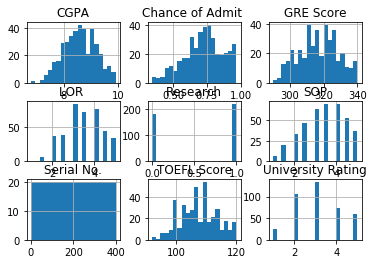

In [13]:
# Your code here
import matplotlib.pyplot as plt
ga_data.hist(bins=20)
plt.show()

## _Notes_
(Your notes here!) 
Provided distribution for all the fields.

## Part 8 Visualize the data
Lets make a copy of the data set and do some simple graphs.

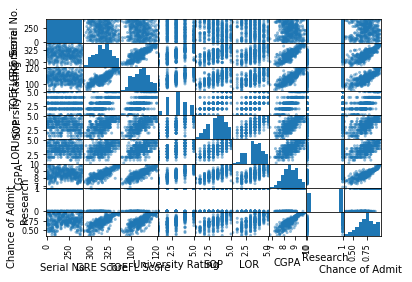

In [14]:
# Your code here
attributes = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
from pandas.plotting import scatter_matrix 
scatter_matrix(ga_data[attributes])
plt.show()

## _Notes_  
(Your notes here!)
considered all the fields as all are numeric fields
some are linear.

## Part 9 - Do Correlation

Check the numerical parameters and see if any are strongly correlated.  This can give an idea of dimensions that are predictive of each other.

In [41]:
# Your code here
correlations = ga_data.corr()
print(correlations)

                   Serial No.        ...         Chance of Admit 
Serial No.           1.000000        ...                 0.042336
GRE Score           -0.097526        ...                 0.802610
TOEFL Score         -0.147932        ...                 0.791594
University Rating   -0.169948        ...                 0.711250
SOP                 -0.166932        ...                 0.675732
LOR                 -0.088221        ...                 0.669889
CGPA                -0.045608        ...                 0.873289
Research            -0.063138        ...                 0.553202
Chance of Admit      0.042336        ...                 1.000000

[9 rows x 9 columns]


## _Notes_
(Your notes here!)
Looks like GRE, TOEFL, CGPA are highly correlated to chance of admission. So, if we have good CGPA and if our GRE, TOEFL score is good. There's high chance to get admission.

## Part 10 - A better scatter plot
Look to see if there are interesting relations to the non-numeric data.  Try some filtering.

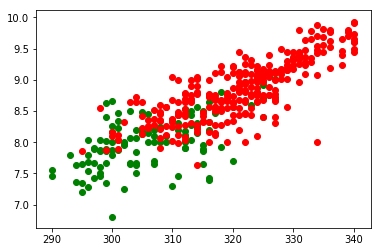

In [61]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np
gre_score = np.ma.masked_where(ga_data["Serial No."]<3, ga_data["GRE Score"])

#Split into 
high_admit = np.ma.masked_where(ga_data["Chance of Admit "]>=0.65, gre_score)
low_admit = np.ma.masked_where(ga_data["Chance of Admit "]<0.65, gre_score)

plt.scatter(x=high_admit, y=ga_data["CGPA"], marker="o", c="green") 
plt.scatter(x=low_admit, y=ga_data["CGPA"], marker="o", c="red") 
plt.show()


## _Notes_
(Your notes here!)
This is clear.I can work with this. We should be able to do a classification of chance of admit based on CGPA and GRE score.

# Bonus
Do an acquisition and preliminary analysis on a second data set.  Compare the data sets.

The second data set is Students Performance
https://www.kaggle.com/spscientist/students-performance-in-exams

In [63]:
import pandas as pd
sp_data = pd.read_csv("StudentsPerformance.csv")
print(sp_data.keys())
sp_data.head(n=5)
sp_data.describe()
sp_data.info()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Looks like there are 8 fields and three of them are numeric.
and i did not find any null values.

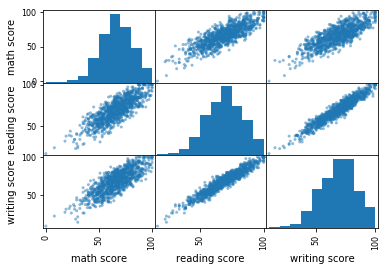

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [66]:
attributes = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']
from pandas.plotting import scatter_matrix 
scatter_matrix(sp_data[attributes])
plt.show()

correlations = sp_data.corr()
print(correlations)

looks math score is linear with writing and reading and there is high correlation between the readiing and writing score 

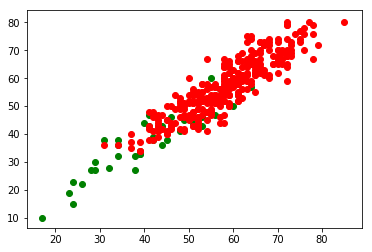

In [69]:
import matplotlib.pyplot as plt
import numpy as np
reading_score = np.ma.masked_where(sp_data["math score"]>60, sp_data["reading score"])

#Split into 
high_score = np.ma.masked_where(sp_data["math score"]>=40, reading_score)
low_score = np.ma.masked_where(sp_data["math score"]<40, reading_score)

plt.scatter(x=high_score, y=sp_data["writing score"], marker="o", c="green") 
plt.scatter(x=low_score, y=sp_data["writing score"], marker="o", c="red") 
plt.show()

We can able to determine the writing score with the reading score.

Both data sets are clear and efficient to analyze the data. Found some correlated data which can be helpful to determine the values.